## Estudo para desenvolver minhas habilidades de Data Science
Name: joao Fillipi dos Santos Nascimento

<a href="https://github.com/linkinn">GitHub</a>

<a href="https://www.facebook.com/flp.linkinn">Facebook</a>

<a href="https://www.linkedin.com/in/fillipi-nascimento-35128070/">Linkedin</a>

## Introdução sobre o Transporte Aereo
O Transporte Aéreo é uma modalidade de transporte realizado pelo ar, através de veículos como os aviões, helicópteros, balões, dirigíveis, teleféricos, dentre outros. Esse tipo de transporte é utilizado para transportar cargas e pessoas, sendo considerado um dos transportes mais seguros. Seu uso foi intensificado após a Segunda Guerra Mundial (1939-1945), e atualmente é um dos transportes mais utilizados no mundo.

A invenção da aeronave no início do século XX, foi atribuída ao brasileiro Santos Dumont, o “Pai da Aviação”, e, desde então, os transportes aéreos se desenvolveram no mundo exponencialmente, o qual permitiu diminuir a distância espaço-tempo de modo rápido, seguro e cômodo.

Para saber mais sobre o inventor, acesse o link: Alberto Santos Dumont

## Sobre esta Analise
Nesta apresentação, eu estarei utilizando dados abertos disponibilizados pela CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos. Tais arquivos conterão informações sobre ocorrências envolvendo aeronaves nos últimos anos. Você pode acessar dados mais atualizados visitando a página oficial de Dados Abertos Brasileiros, mas, caso deseje, poderá estar realizando o download dos datasets utilizados aqui através dos links de download abaixo. 

Para este estudo, utilizarei de dois datasets da CENIPA: 

<a href="./dataset/ocorrencia.csv">Ocorrencia.csv</a>: possui os dados sobre cada ocorrência registrada nos últimos 10 anos. Código da ocorrência, Data, Motivo da Ocorrência e Localização serão encontrados nesse conjunto de dados. 

<a href="./dataset/aeronave.csv">Aeronave.csv</a>: informações agrupadas sobre as aeronaves envolvidas nas ocorrências registradas no arquivo ocorrencia.csv. Aqui serão encontrados dados como: Modelo da Aeronave, Tipo de Aeronave, Fabricante, Quantidade de Fatalidades, dentre outras.

### Importando Bibliotecas

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [12, 8], 'axes.labelsize': 15,\
   'axes.titlesize': 16, 'font.size': 12, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 12,\
   'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(style='darkgrid',rc=rc)

### Lendo Arquivos

In [234]:
df_aeronave = pd.read_csv('dataset/aeronave.csv')
df_ocorrencia = pd.read_csv('dataset/ocorrencia.csv')

df_aeronave.head(5)

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.00,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,nan,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.00,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,nan,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.00,2310,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,nan,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.00,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,nan,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.00,52389,...,BRASIL,TPR,REGULAR,****,****,SUBIDA,REGULAR,NENHUM,nan,2016-07-30


In [235]:
df_ocorrencia.head(5)

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,nan,NaN,0,1,nan,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.00,2014-04-07,0,1,nan,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.00,2016-07-07,0,1,1.00,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.00,2012-09-20,4,1,nan,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,nan,NaN,0,1,nan,2016-07-30


### Analisando e explorando os Dados de Ocorrencias

In [236]:
df_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 19 columns):
codigo_ocorrencia           2027 non-null int64
classificacao               2027 non-null object
tipo                        2027 non-null object
localidade                  2027 non-null object
uf                          2027 non-null object
pais                        2027 non-null object
aerodromo                   2024 non-null object
dia_ocorrencia              2027 non-null object
horario                     2027 non-null object
sera_investigada            2027 non-null object
comando_investigador        2027 non-null object
status_investigacao         1821 non-null object
numero_relatorio            1821 non-null object
relatorio_publicado         995 non-null float64
dia_publicacao              995 non-null object
quantidade_recomendacoes    2027 non-null int64
aeronaves_envolvidas        2027 non-null int64
saida_pista                 256 non-null float64
dia_extracao   

In [237]:
df_ocorrencia.columns

Index(['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada',
       'comando_investigador', 'status_investigacao', 'numero_relatorio',
       'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
       'aeronaves_envolvidas', 'saida_pista', 'dia_extracao'],
      dtype='object')

In [238]:
#Retirando colunas que não serão usadas
df_ocorrencia.drop(['localidade', 'aerodromo', 'horario', 'sera_investigada',
       'comando_investigador', 'numero_relatorio', 'relatorio_publicado', 
       'dia_publicacao', 'quantidade_recomendacoes', 'aeronaves_envolvidas', 
       'saida_pista', 'dia_extracao'], axis = 1, inplace = True)

In [239]:
df_ocorrencia.head(5)

,codigo_ocorrencia,classificacao,tipo,uf,pais,dia_ocorrencia,status_investigacao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,RO,BRASIL,2013-05-05,NaN
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,RO,BRASIL,2013-11-25,FINALIZADA
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,RO,BRASIL,2008-08-07,FINALIZADA
3,44988,ACIDENTE,POUSO LONGO,RR,BRASIL,2011-08-11,FINALIZADA
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,RS,BRASIL,2009-12-28,ATIVA


#### Classificação das ocorrencias causadas

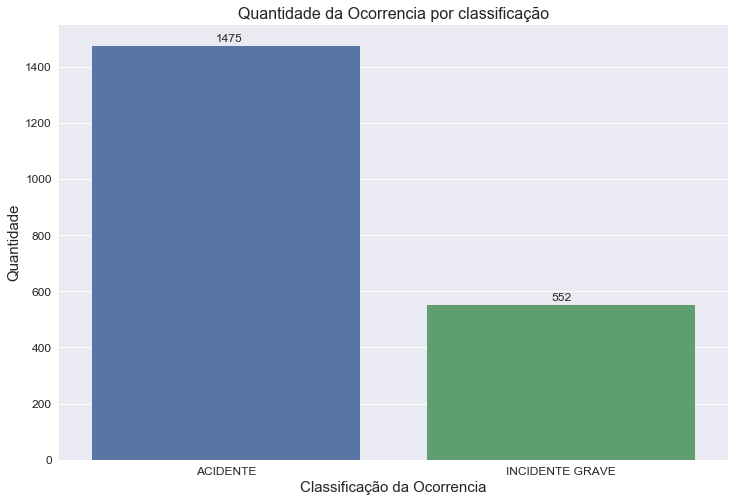

In [240]:
c = sns.countplot(df_ocorrencia['classificacao'])
plt.title('Quantidade da Ocorrencia por classificação')
plt.xlabel('Classificação da Ocorrencia')
plt.ylabel('Quantidade')

for p in c.patches:
    b=p.get_bbox()
    c.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

Após analisar os dados podemos observar que as ocorrências estão classificadas em acidente e incidente grave, também podemos ver que nem todas as ocorrências que acontecem em transportes aéreos são consideradas como graves ou que tenham fatalidades.

#### Tipos de Ocorrencias causadas nos ultimos anos

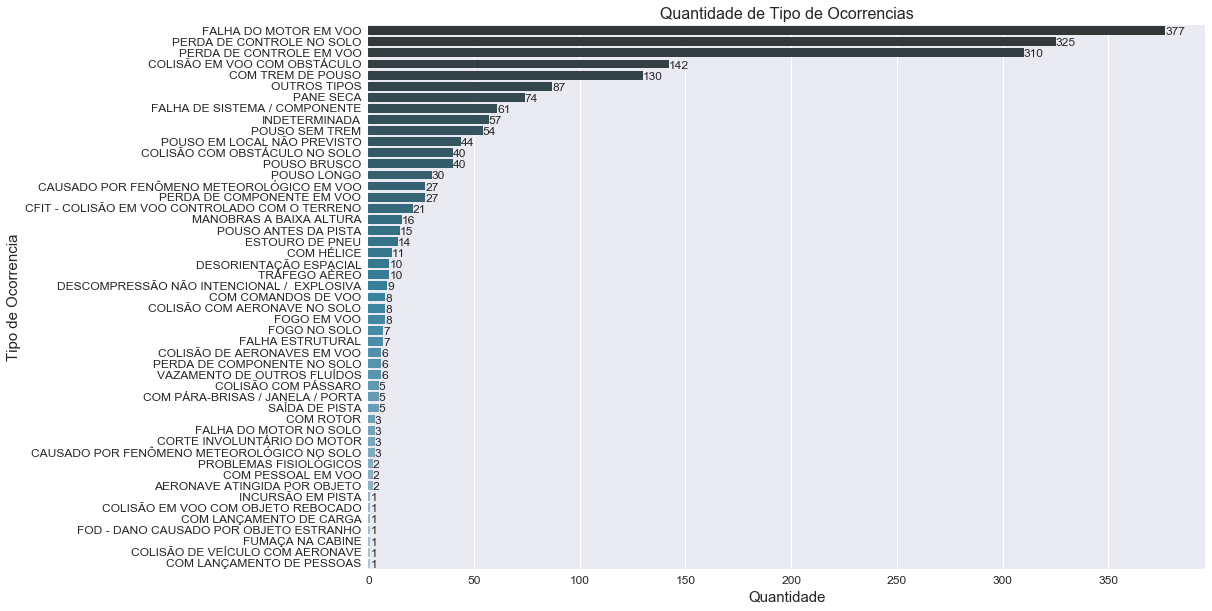

In [245]:
plt.subplots(figsize=(15,10))
t = sns.countplot(y=df_ocorrencia['tipo'], order = df_ocorrencia['tipo'].value_counts().index, palette='PuBuGn_d')
plt.title('Quantidade de Tipo de Ocorrencias')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Ocorrencia')

for p in t.patches:
    b=p.get_bbox()
    t.annotate("{:.0f}".format(b.x1 + b.x0), ((b.x0 + b.x1), b.y1 + 0))

No gráfico acima onde representa o tipos de falhas que causam a maioria dos acidentes podemos ver que a falha do motor em voo estar em primeiro lugar com 377 ocorrências, vindo logo em seguida a perda de controle no solo e perda de controle em voo. Podemos ver que a maioria dos acidente são causadas pelo o erro humano, porem nem sempre as causas são essas por exemplo temos uma ocorrência causada por fenômenos meteorológicos em voo.

#### Progressão desses últimos anos

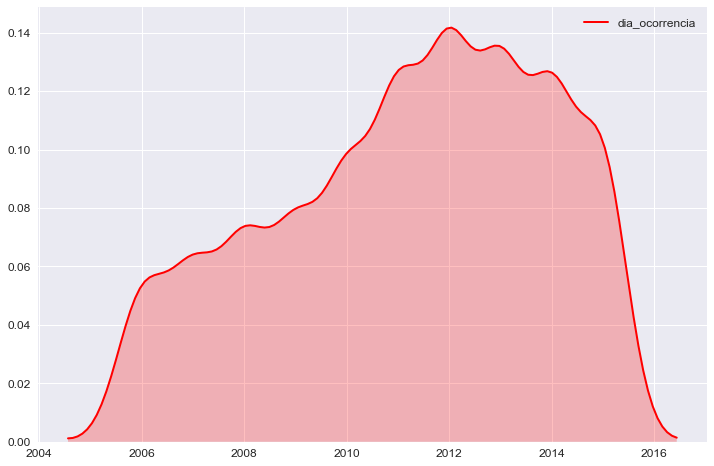

In [246]:
plt.subplots(figsize=(12,8))
sns.kdeplot(df_ocorrencia['dia_ocorrencia'].apply(lambda x: x.replace(x,x[0:4])), color="r", shade=True,  bw=.48)

Text(0,0.5,'QUANTIDADE DE OCORRÊNCIAS')

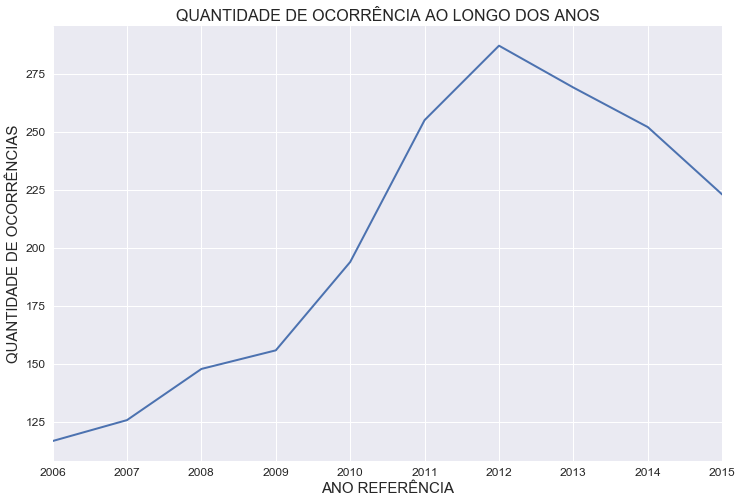

In [247]:
plot_year = df_ocorrencia.copy()
plot_year['dia_ocorrencia'] = plot_year['dia_ocorrencia'].apply(lambda x: x.replace(x,x[0:4]))
year_serie = pd.Series(plot_year['dia_ocorrencia'].value_counts().sort_index())
year_serie.plot()
plt.title('QUANTIDADE DE OCORRÊNCIA AO LONGO DOS ANOS')
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')

As ocorrências de acidentes aéreos tem aumentado muito nos últimos anos. Enquanto em 2006 tivemos uma taxa muito baixa de menos que 125 ocorrências, em 2012 esse número subiu absurdamente para mais de 275 ocorrências. Lembrando que em 2007 pelo fato de te ocorrido menos acidentes que nos anos atuais, nesse ano tivemos um dos maiores desastres aéreo do Brasil: o acidente da TAM, que matou 194 pessoas. Mas nos anos após 2012 a taxa começou a diminuir.

#### Ocorrencias registradas por estados

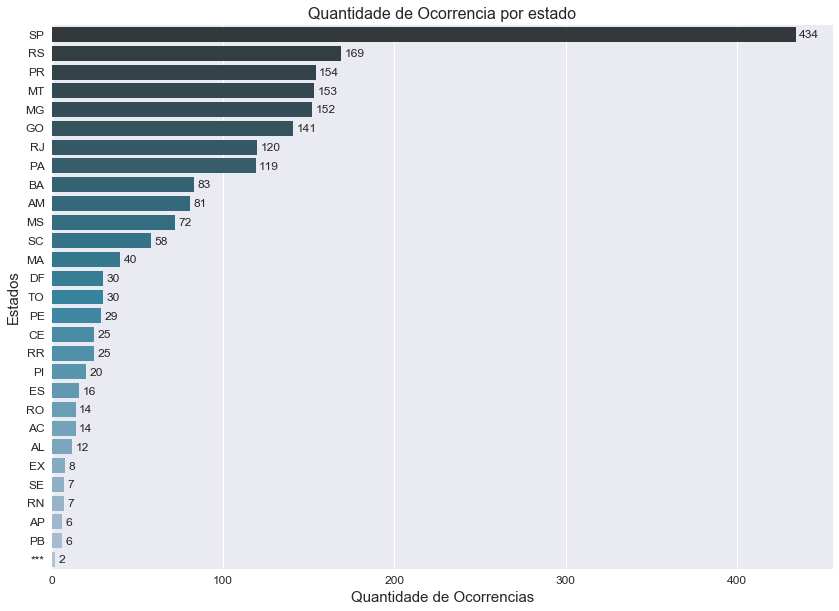

In [248]:
plt.subplots(figsize=(14,10))
uf = sns.countplot(y=df_ocorrencia['uf'], order = df_ocorrencia['uf'].value_counts().index, palette='PuBuGn_d')
plt.title('Quantidade de Ocorrencia por estado')
plt.xlabel('Quantidade de Ocorrencias')
plt.ylabel('Estados')

for p in uf.patches:
    b=p.get_bbox()
    uf.annotate("{:.0f}".format(b.x1 + b.x0), ((b.x0 + b.x1) + 2, b.y1 - 0.2))

O Estado de São Paulo foi o que mais teve ocorrências de 2006 a 2015. O número e absurdamente alto, só em SP tem mais ocorrências do que vários outros estados juntos. O estado de São Paulo possui dezenas de aeroportos e os dois maiores aeroportos do Brasil quando se considera a movimentação de cargas: o Aeroporto de Cumbica(Código IATA GRU / Código ICAO SBGR), em Guarulhos, e o Aeroporto de Viracopos em Campinas (Código IATA VCP / Código ICAO SBKP), a 99 km da capital paulista.

Você deve ter percebido duas informações diferentes nesse gráfico: os "estados" \*** e EX. 

EX: Representa ocorrências registradas fora do território brasileiro, mas com aeronaves nacionais.

\***: Representam locais que não tiveram sua localização identificadas (vide tabela abaixo).


### Analisando e explorando os Dados das Aeronaves

In [249]:
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 22 columns):
codigo_aeronave           2043 non-null int64
codigo_ocorrencia         2043 non-null int64
matricula                 2043 non-null object
codigo_operador           2043 non-null int64
equipamento               2043 non-null object
fabricante                2043 non-null object
modelo                    2043 non-null object
tipo_motor                2043 non-null object
quantidade_motores        2034 non-null float64
peso_maximo_decolagem     2043 non-null int64
quantidade_assentos       2025 non-null float64
ano_fabricacao            2039 non-null float64
pais_registro             2043 non-null object
categoria_registro        2043 non-null object
categoria_aviacao         2043 non-null object
origem_voo                2043 non-null object
destino_voo               2043 non-null object
fase_operacao             2043 non-null object
tipo_operacao             2043 non-null object
n

In [250]:
df_aeronave.columns

Index(['codigo_aeronave', 'codigo_ocorrencia', 'matricula', 'codigo_operador',
       'equipamento', 'fabricante', 'modelo', 'tipo_motor',
       'quantidade_motores', 'peso_maximo_decolagem', 'quantidade_assentos',
       'ano_fabricacao', 'pais_registro', 'categoria_registro',
       'categoria_aviacao', 'origem_voo', 'destino_voo', 'fase_operacao',
       'tipo_operacao', 'nivel_dano', 'quantidade_fatalidades',
       'dia_extracao'],
      dtype='object')

In [251]:
df_aeronave.drop(['codigo_aeronave',  'matricula', 'codigo_operador', 'quantidade_motores', 
                  'peso_maximo_decolagem', 'quantidade_assentos', 'ano_fabricacao', 'origem_voo', 'destino_voo', 
                  'dia_extracao'], axis = 1, inplace = True)
df_aeronave.head(5)

,codigo_ocorrencia,equipamento,fabricante,modelo,tipo_motor,pais_registro,categoria_registro,categoria_aviacao,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades
0,45602,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,BRASIL,PRI,INSTRUÇÃO,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,nan
1,53551,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,BRASIL,PRI,INSTRUÇÃO,DECOLAGEM,INSTRUÇÃO,LEVE,nan
2,43721,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,BRASIL,TPX,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,nan
3,35556,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,BRASIL,TPP,PARTICULAR,CORRIDA APÓS POUSO,PRIVADA,LEVE,nan
4,32579,AVIÃO,BOEING COMPANY,737-241,JATO,BRASIL,TPR,REGULAR,SUBIDA,REGULAR,NENHUM,nan


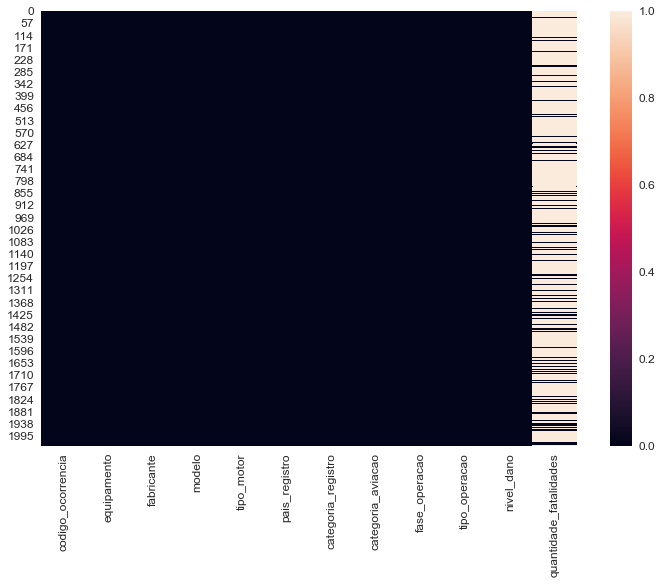

In [252]:
sns.heatmap(df_aeronave.isnull())

Nesse gráfico de mapa de calor podemos ver a quantidade de dados nulos na coluna (<b>quantidade_fatalidade</b>), esses dados representa onde não ouve fatalidades, então podemos transforma esses dados nulos em 0 para melhor manipulação.

In [253]:
df_aeronave['quantidade_fatalidades'].fillna(0, inplace=True)
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 12 columns):
codigo_ocorrencia         2043 non-null int64
equipamento               2043 non-null object
fabricante                2043 non-null object
modelo                    2043 non-null object
tipo_motor                2043 non-null object
pais_registro             2043 non-null object
categoria_registro        2043 non-null object
categoria_aviacao         2043 non-null object
fase_operacao             2043 non-null object
tipo_operacao             2043 non-null object
nivel_dano                2043 non-null object
quantidade_fatalidades    2043 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 191.6+ KB


Podemos ver que os dados na coluna (quantidade_fatalidade) esta como float (número com ponto flutuante), porem vamos convertê-lo para um número inteiro, pois não existe fatalidade onde morra 1.5 pessoa.

In [254]:
df_aeronave['quantidade_fatalidades'] = pd.to_numeric(df_aeronave['quantidade_fatalidades'],  downcast='integer')
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 12 columns):
codigo_ocorrencia         2043 non-null int64
equipamento               2043 non-null object
fabricante                2043 non-null object
modelo                    2043 non-null object
tipo_motor                2043 non-null object
pais_registro             2043 non-null object
categoria_registro        2043 non-null object
categoria_aviacao         2043 non-null object
fase_operacao             2043 non-null object
tipo_operacao             2043 non-null object
nivel_dano                2043 non-null object
quantidade_fatalidades    2043 non-null int16
dtypes: int16(1), int64(1), object(10)
memory usage: 179.6+ KB


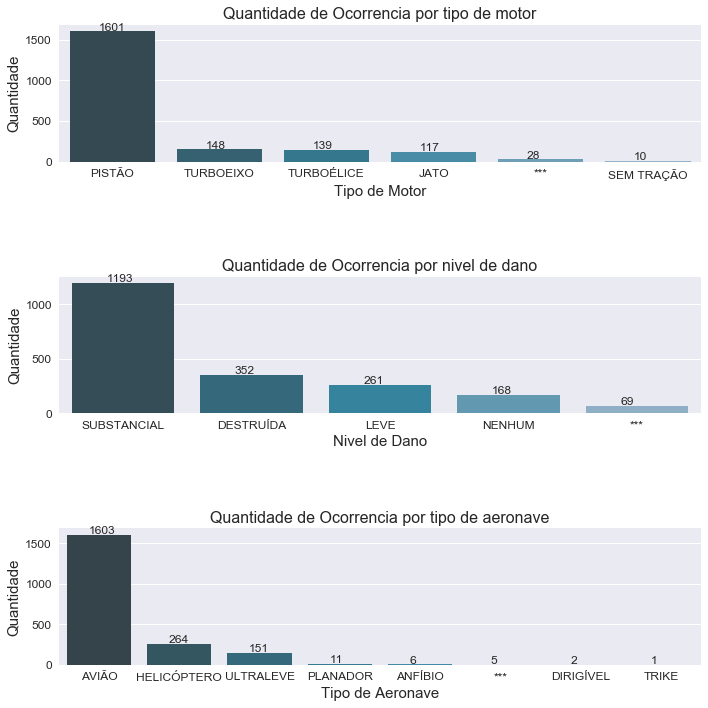

In [255]:
fig, axes = plt.subplots(3, 1, figsize=(10,10))
tm = sns.countplot(df_aeronave['tipo_motor'], order=df_aeronave['tipo_motor'].value_counts().index, ax=axes[0], palette="PuBuGn_d")
for p in tm.patches:
    b=p.get_bbox()
    tm.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.13, b.y1 + 15))
axes[0].set_title('Quantidade de Ocorrencia por tipo de motor')
axes[0].set_xlabel('Tipo de Motor')
axes[0].set_ylabel('Quantidade')
plt.tight_layout(h_pad=5.0)
    
nd = sns.countplot(df_aeronave['nivel_dano'], order=df_aeronave['nivel_dano'].value_counts().index, ax=axes[1], palette="PuBuGn_d")
for p in nd.patches:
    b=p.get_bbox()
    nd.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.13, b.y1 + 15))
axes[1].set_title('Quantidade de Ocorrencia por nivel de dano')
axes[1].set_xlabel('Nivel de Dano')
axes[1].set_ylabel('Quantidade')
plt.tight_layout(h_pad=5.0)

equip = sns.countplot(df_aeronave['equipamento'], order=df_aeronave['equipamento'].value_counts().index, ax=axes[2], palette="PuBuGn_d")
for p in equip.patches:
    b=p.get_bbox()
    equip.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.13, b.y1 + 15))
axes[2].set_title('Quantidade de Ocorrencia por tipo de aeronave')
axes[2].set_xlabel('Tipo de Aeronave')
axes[2].set_ylabel('Quantidade')
plt.tight_layout(h_pad=5.0)

Podemos ver que aviões com pistões esta disparadamente na frente com mais de 1500 ocorrências. Além de baixo custo, eles são semelhantes aos motores de carro, e eles levaram para o céu o primeiro plano e o primeiro helicóptero.

Nem toda ocorrência teve danos críticos, podemos ver que no topo esta os danos substancial, que são mais de 1100 ocorrências, e também tivemos ocorrências onde simplesmente não causaram nenhum tipo de dano as aeronaves, de danos que causaram destruição foram apenas de 352 ocorrências. 

Definitivamente, essas ocorrências a maioria envolve aviões, na verdade a somas das outras aeronaves não chega nem perto das ocorrências com avião.

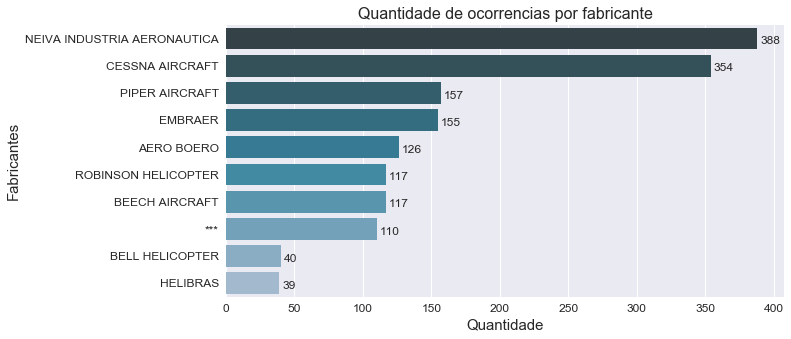

In [256]:
fabricante_10 = df_aeronave['fabricante'].value_counts().head(10)
plt.figure(figsize=(10,5))
fab = sns.barplot(y=fabricante_10.index, x=fabricante_10.values, palette='PuBuGn_d')
plt.title('Quantidade de ocorrencias por fabricante')
plt.ylabel('Fabricantes', fontsize=15)
plt.xlabel('Quantidade')
for p in fab.patches:
    b=p.get_bbox()
    fab.annotate("{:.0f}".format(b.x1 + b.x0), ((b.x0 + b.x1) + 2, b.y1 - 0.2))

Neiva Industria está no topo das ocorrência por fabricante, que surgiu em 12 de outubro de 1954, mais de 50 anos no mercado produzindo aviões, principalmente aviões com pistão, isso explica o fato dela ter várias ocorrências, pois aviões com motores a  pistão está ocupando o topo com mais de 1500 ocorrências. E logo atrás vem a Cessna Aircraft uma empresa que produziu mais de seis mil jatos executivos.

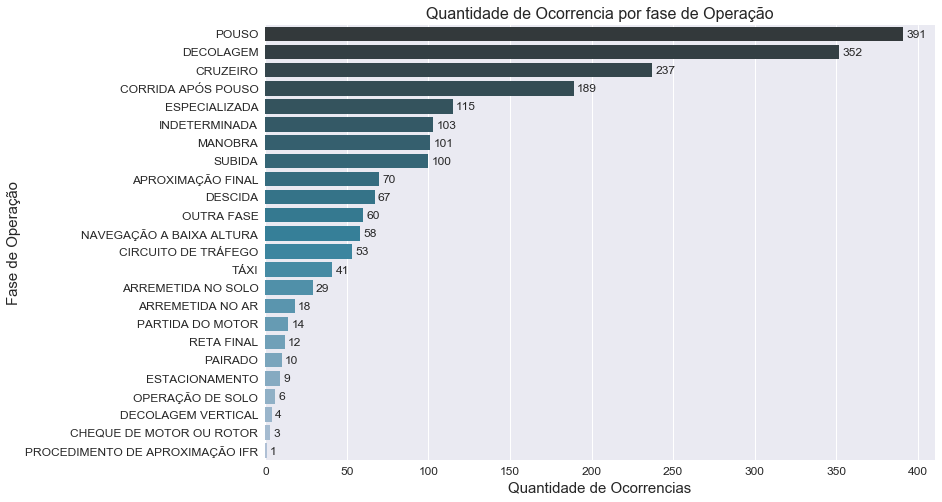

In [257]:
fo = sns.countplot(y=df_aeronave['fase_operacao'], order=df_aeronave['fase_operacao'].value_counts().index, palette='PuBuGn_d')
plt.title('Quantidade de Ocorrencia por fase de Operação')
plt.xlabel('Quantidade de Ocorrencias')
plt.ylabel('Fase de Operação')

for p in fo.patches:
    b=p.get_bbox()
    fo.annotate("{:.0f}".format(b.x1 + b.x0), ((b.x0 + b.x1) + 2, b.y1 - 0.2))

De fato as partes mais complicado em uma aeronave e a decolagem e o pouso, as duas estão no topo das ocorrências com quase 400 ocorrências, porem nem toda ocorrência teve uma fatalidade ou um dano no avião.

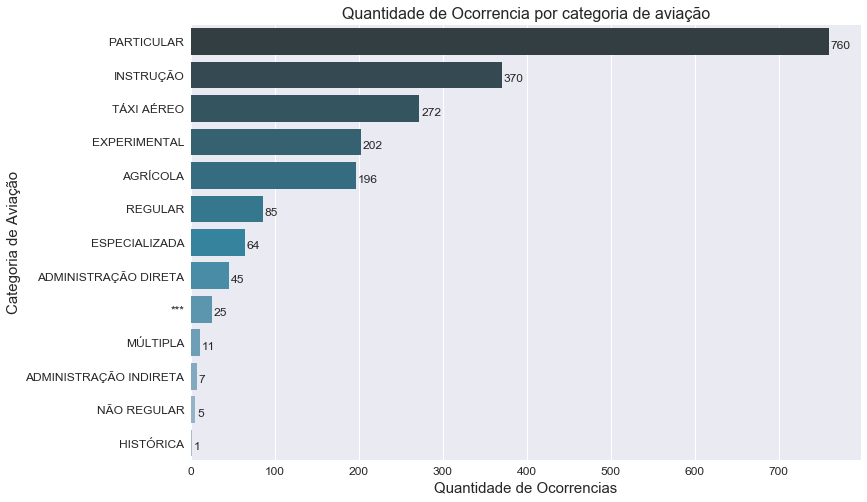

In [258]:
ca = sns.countplot(y=df_aeronave['categoria_aviacao'], order=df_aeronave['categoria_aviacao'].value_counts().index, palette='PuBuGn_d')
plt.title('Quantidade de Ocorrencia por categoria de aviação')
plt.xlabel('Quantidade de Ocorrencias')
plt.ylabel('Categoria de Aviação')

for p in ca.patches:
    b=p.get_bbox()
    ca.annotate("{:.0f}".format(b.x1 + b.x0), ((b.x0 + b.x1) + 2, b.y1 - 0.2))

No gráfico acima podemos ver que a maioria dos acidentes são causados por aviões particulares, o transporte Regular que e o transporte que as companhias aéreas oferecem para o público, possui poucas ocorrências abaixo de 100 nos últimos anos.

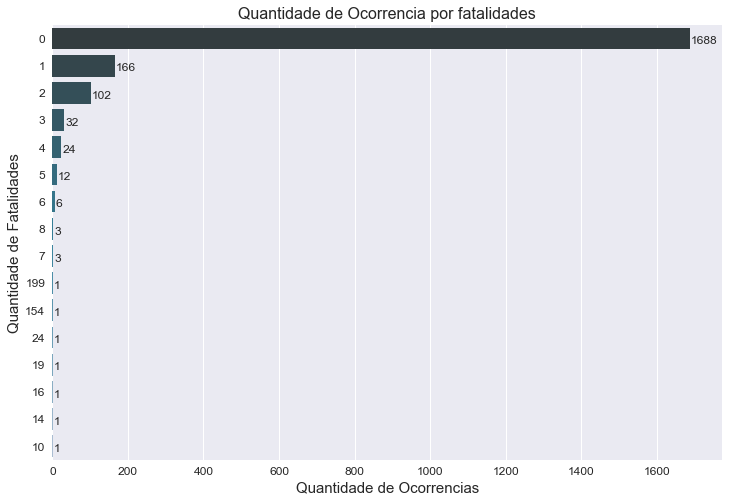

In [259]:
qf = sns.countplot(y=df_aeronave['quantidade_fatalidades'], order=df_aeronave['quantidade_fatalidades'].value_counts().index, palette='PuBuGn_d')
plt.title('Quantidade de Ocorrencia por fatalidades')
plt.xlabel('Quantidade de Ocorrencias')
plt.ylabel('Quantidade de Fatalidades')

for p in qf.patches:
    b=p.get_bbox()
    qf.annotate("{:.0f}".format(b.x1 + b.x0), ((b.x0 + b.x1) + 2, b.y1 - 0.2))

Podemos ver no gráfico acima que a maioria das fatalidades felizmente e 0, porem tivemos bastante fatalidades com 1 e 2 pessoas, isso mostra que a maioria dos acidentes são de aviões pequenos e particulares, no caso aviões que tem acentos bem limitados, também devemos lembrar que a maioria das ocorrências são de aviões que usam pistão, tipos de aeronaves que a fábrica Neiva Industria produz

E podemos ver dois fatos bem trágicos no gráfico, são as duas maiores fatalidade que aconteceu com 199 pessoas e outra com 154 pessoas.

Na tabela abaixo podemos ver essa duas fatalidades 


In [260]:
df_aeronave[df_aeronave['quantidade_fatalidades']>100]

,codigo_ocorrencia,equipamento,fabricante,modelo,tipo_motor,pais_registro,categoria_registro,categoria_aviacao,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades
620,29859,AVIÃO,AIRBUS INDUSTRIE,A320-233,JATO,BRASIL,TPR,REGULAR,POUSO,REGULAR,DESTRUÍDA,199
638,30375,AVIÃO,BOEING COMPANY,737-8EH,JATO,BRASIL,TPR,REGULAR,CRUZEIRO,REGULAR,DESTRUÍDA,154


Links que fala sobre as duas fatalidades:

<a href="https://pt.wikipedia.org/wiki/Voo_Gol_1907">Gol 1907</a>

<a href="https://www.bbc.com/portuguese/brasil-40539541">Voo JJ 3054</a>